#### Load Dataset

Load train and test datasets

In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_labels.shape

(60000,)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
test_labels.shape

(10000,)

We have following with us:

<br>**Training Set**
- 60000 images
- Each image is of the shape 28 x 28 (rows x columns)
- 60000 labels defining the digit that corresponds to the respective image

<br>**Test Set**
- 10000 images
- Each image is of the shape 28 x 28 (rows x columns)
- 10000 labels defining the digit that corresponds to the respective image

#### Dataset Visualization

Let us visualize the handwritten digit images and labels for 0th training sample. We can see that the 0th image shows a handwritten 5 and the 0th label has the value 5. 

In [7]:
import matplotlib.pyplot as plt

In [8]:
# running this once shows the plts in gray scale as default
# https://stackoverflow.com/questions/3823752/display-image-as-grayscale-using-matplotlib
plt.gray()

<Figure size 432x288 with 0 Axes>

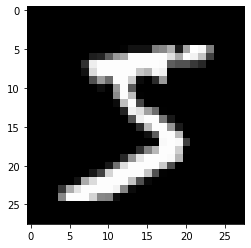

In [9]:
# if we do run the plt.gray() ... below code would have shown a color image
plt.imshow(train_images[0])

In [10]:
train_labels[0]

5

### CNN based solution

#### Define Model

In [37]:
from keras import models

In [38]:
from keras import layers

In [39]:
model_cnn = models.Sequential()

Layer Details:
- 2 dimensional Convolution Layer
- Number of filters/kernels = 32
- Filter/Kernel Size = 3x3
- Activation Function = relu (for non-linearity detection)
- Input Shape = 28x28 matrix with 1 channel (as image is gray scale, we have only 1 channel)

In [40]:
model_cnn.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))

Layer Details:
- Downsample the output from previous layer
- We will take the max value for a every 2x2 window ... moved over the input

In [41]:
model_cnn.add(layers.MaxPooling2D(2,2))

Layer Details:
- 2 dimensional Convolution Layer
- Number of filters/kernels = 64
- Filter/Kernel Size = 3x3
- Activation Function = relu (for non-linearity detection)

In [42]:
model_cnn.add(layers.Conv2D(64, (3,3), activation = 'relu'))

Layer Details:
- Downsample the output from previous layer
- We will take the max value for a every 2x2 window ... moved over the input

In [43]:
model_cnn.add(layers.MaxPooling2D(2,2))

Layer Details:
- 2 dimensional Convolution Layer
- Number of filters/kernels = 64
- Filter/Kernel Size = 3x3
- Activation Function = relu (for non-linearity detection)

In [44]:
model_cnn.add(layers.Conv2D(64, (3,3), activation='relu'))

Data at this stage is in matrix form. We will convert it to vector form to feed to a fully connected network (FCN).

In [45]:
model_cnn.add(layers.Flatten())

We will design for 64 outputs with activation function as relu (to learn non-linearity).

In [46]:
model_cnn.add(layers.Dense(64, activation = 'relu'))

This is the final layer. Hence, the outputs will be 10 corresponding to the 10 digits (0 to 9).
Activation Function chosen here is softmax to have a probabilistic output. 

In [47]:
model_cnn.add(layers.Dense(10, activation = 'softmax'))

In [48]:
model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

#### Data Preprocessing - Train and Test Images

In [49]:
train_images.shape

(60000, 28, 28)

CNN needs another dimension for the channel. Here as the image is gray scale it will be 1 channel. If we had color images, the channel value would have been 3 for the three channels - Red, Green and Blue. 

In [50]:
train_images_cnn = train_images.reshape(60000, 28, 28, 1)

In [51]:
train_images_cnn.shape

(60000, 28, 28, 1)

We need to change the element values from integer to decimal to have continuos values during prediction through the various layers. We will limit the values to the interval [0,1] so that the model treats each sample with equal weightage as the range of values for all samples will be fixed. We will do this by dividing the decimal values by 255 (gray scale values are from 0 to 255 ... 0 representing black to white).

In [52]:
train_images_cnn = train_images_cnn.astype('float32') / 255

In [53]:
test_images_cnn = test_images.reshape(10000, 28, 28, 1)

In [54]:
test_images_cnn = test_images_cnn.astype('float32') / 255

#### Data Preprocessing - Train and Test Labels

We will convert the labels to 10bit values. Only 1 of the bits of the 10bit value will be 1 corresponding to the location for the respective digit and rest all bits will be 0. This is required to match to the model's output layer expectation so that we can effectively train and test. 

In [55]:
from keras.utils import to_categorical

In [56]:
train_labels_cnn = to_categorical(train_labels)

In [57]:
test_labels_cnn = to_categorical(test_labels)

#### Define the optimizer function, loss function and metrics to be used for the model.
- Going ahead with the well known functions at this point in time
- Selected accuracy as the metrics to understand validation / test accuracy of the model

In [58]:
model_cnn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

#### Train the Model

#### We will now train the model using train images and train labels. 
- We will use a batch size = 60.
- 1 epoch = 60000 / 60 = 1000 batches
- 1 epoch = 1 complete run of all train samples for training the model
- We will go for a total of 5 epochs = 5 complete run of the all train samples

In [59]:
model_cnn.fit(train_images_cnn, train_labels_cnn, epochs = 5, batch_size = 60)

Epoch 1/5
60000/60000 [==============================] - 38s 636us/step - loss: 0.1731 - accuracy: 0.9459
Epoch 2/5
60000/60000 [==============================] - 38s 639us/step - loss: 0.0477 - accuracy: 0.9853
Epoch 3/5
60000/60000 [==============================] - 39s 647us/step - loss: 0.0327 - accuracy: 0.9898
Epoch 4/5
60000/60000 [==============================] - 40s 665us/step - loss: 0.0243 - accuracy: 0.9925
Epoch 5/5
60000/60000 [==============================] - 39s 645us/step - loss: 0.0198 - accuracy: 0.9941


At this run, we got a training accuracy of **~99.4%**

#### Test the Model

We will now test model's performance with the test data.
- We predict the class for each of the 10000 test using the model.
- We will check the test accuracy.

In [60]:
test_loss_cnn, test_acc_cnn = model_cnn.evaluate(test_images_cnn, test_labels_cnn)

10000/10000 [==============================] - 2s 181us/step


In [61]:
print('test accuracy:', (test_acc_cnn*100))

test accuracy: 99.26999807357788


At this run, we got a training accuracy of **~99.3%**